<a href="https://colab.research.google.com/github/CliffBooth/telecom_labs/blob/main/code/lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
from thinkdsp import *
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import matplotlib.pyplot as plt
InteractiveShell.ast_node_interactivity = 'all'

# **Лабараторная работа №10**

**Exercise #10.1**

Modify the example in chap10.ipynb and confirm that zero-padding eliminates the extra note at the beginning of the output

Добавим 0 в начало обоих сигналов.

In [89]:
if not os.path.exists('180960__kleeb__gunshot.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/180960__kleeb__gunshot.wav

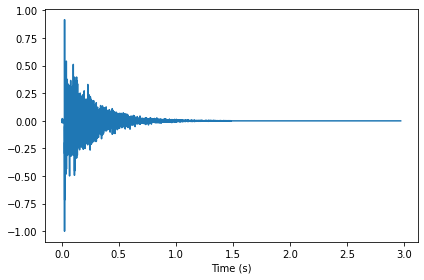

In [90]:
response = read_wave('180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.truncate(2**16)
response.zero_pad(2**17)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

response.make_audio()

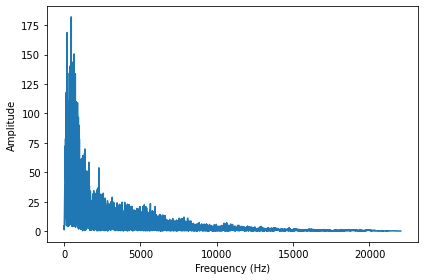

In [91]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [92]:
if not os.path.exists('92002__jcveliz__violin-origional.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav

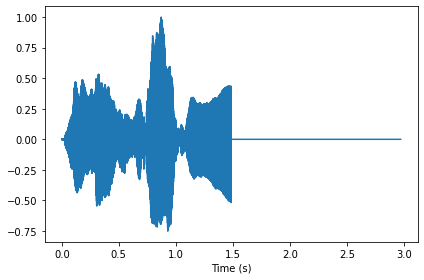

In [93]:
violin = read_wave('92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(2**16)
violin.zero_pad(2**17)

violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

violin.make_audio()

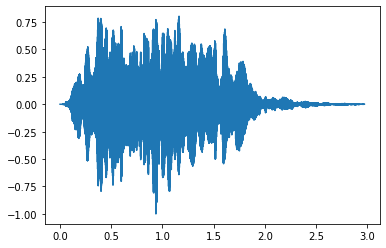

In [94]:
spectrum = violin.make_spectrum()
wave = (spectrum * transfer).make_wave()
wave.normalize()
wave.plot()

In [95]:
wave.make_audio()

Лишней ноты в начале больше нет.

**Exercise #10.2**

Simulate the sound of your recording in the space where the impulse response
was measured, computed two way: by convolving the recording with the im-
pulse response and by computing the filter that corresponds to the impulse
response and multiplying by the DFT of the recording

Загрузим звук - результат импульса в пространстве.

In [96]:
filename = 'stalbans_a_mono.wav'
if not os.path.exists(filename):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/stalbans_a_mono.wav

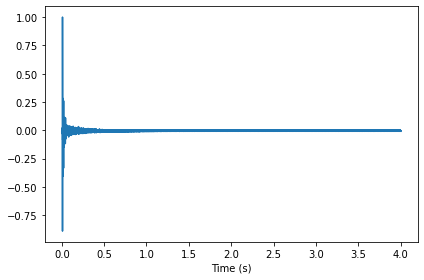

In [97]:
response = read_wave(filename)
start = 0
duration = 4
response = response.segment(duration=duration)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

In [98]:
response.make_audio()

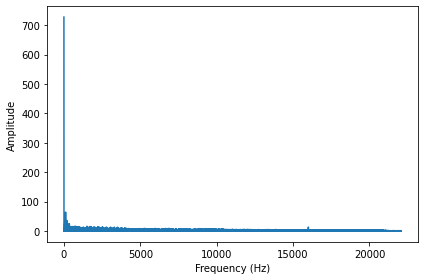

In [99]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [100]:
if not os.path.exists('trumpet.wav'):
    !wget https://github.com/CliffBooth/telecom_labs/raw/main/samples/trumpet.wav

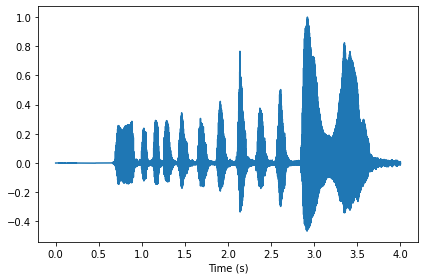

In [101]:
wave = read_wave('trumpet.wav')

start = 0.0
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()
wave.plot()
decorate(xlabel='Time (s)')

Звучание до трансформации:

In [102]:
wave.make_audio()

После трансформации:

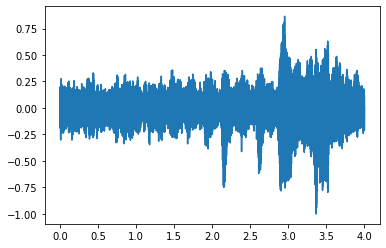

In [103]:
spectrum = wave.make_spectrum()

output = (spectrum * transfer).make_wave()
output.normalize()
output.plot()
output.make_audio()

Доббемся такого же эффекта, используя свертку.

In [104]:
convolved2 = wave.convolve(response)
convolved2.normalize()
convolved2.make_audio()